In [112]:
from joblib import load
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [113]:
dt_classifier = load('dt_classifier.joblib')

In [114]:
with open('NBA Champion RawData.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)

In [115]:
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,ï»¿Season,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Conference 5=> rec,Conference OR,Conference SRS,...,3PAr,TS%,Offense Four Factors|eFG%,Offense Four Factors|TOV%,Offense Four Factors|ORB%,Offense Four Factors|FT/FGA,Defense Four Factors|eFG%,Defense Four Factors|TOV%,Defense Four Factors|DRB%,Defense Four Factors|FT/FGA
0,2024,Indiana Pacers 2024,Indiana Pacers,29,29 2024,East,East 2024,0.47297571,0.471544715,-0.981333333,...,0.38,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228
1,2024,Boston Celtics 2024,Boston Celtics,6,6 2024,East,East 2024,0.47297571,0.471544715,-0.981333333,...,0.471,0.609,0.578,10.8,24.9,0.18,0.523,10.8,76.3,0.145
2,2024,Oklahoma City Thunder 2024,Oklahoma City Thunder,26,26 2024,West,West 2024,0.524223745,0.528455285,0.981333333,...,0.383,0.608,0.573,11.4,21.1,0.198,0.53,13.6,73.8,0.202
3,2024,Milwaukee Bucks 2024,Milwaukee Bucks,3,3 2024,East,East 2024,0.47297571,0.471544715,-0.981333333,...,0.43,0.601,0.568,11.5,21.8,0.209,0.539,10.6,77.2,0.189
4,2024,Atlanta Hawks 2024,Atlanta Hawks,22,22 2024,East,East 2024,0.47297571,0.471544715,-0.981333333,...,0.408,0.576,0.539,11.6,27.1,0.2,0.572,12.4,75.2,0.192


In [116]:
# df_2023 = df[df['\ufeffSeason'] == '2023']
df_2023 = df[df['ï»¿Season'] == '2024']

In [117]:
feature_names = ['rk conference', 'sum mvp shares', 'Conference OR', 'overall record', 'MOV']
feature_df_2023 = df_2023[feature_names]
feature_df_2023.head()

,rk conference,sum mvp shares,Conference OR,overall record,MOV
0,5,0.017,0.471544715,0.573170732,3.05
1,1,0.324,0.471544715,0.780487805,11.34
2,1,0.046,0.528455285,0.695121951,7.41
3,3,3.865,0.471544715,0.597560976,2.62
4,10,0,0.471544715,0.43902439,-2.18


In [118]:
label_names = ['champion']
label_df_2023 = df_2023[label_names]
label_df_2023.head()

,champion
0,0
1,0
2,0
3,0
4,0


In [119]:
y_scores = dt_classifier.predict_proba(feature_df_2023)[:, 1]
y_scores

array([0.        , 0.        , 0.94478528, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.95216401, 0.        ,
       0.        , 0.        , 0.43137255, 0.13173653, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [120]:
training_predictions = dt_classifier.predict(feature_df_2023)
training_accuracy = accuracy_score(label_df_2023, training_predictions)
print("Training Accuracy:", training_accuracy)

training_conf_matrix = confusion_matrix(label_df_2023, training_predictions)
tn_train, fp_train, fn_train, tp_train = training_conf_matrix.ravel()
false_negative_rate_train = fn_train / (fn_train + tp_train)
print("Training False Negative Rate:", false_negative_rate_train)


false_positive_rate_train = fp_train / (fp_train + tn_train)
print("Training False Positive Rate:", false_positive_rate_train)


Training Accuracy: 0.9333333333333333
Training False Negative Rate: nan
Training False Positive Rate: 0.06666666666666667


C:\Users\evan3\AppData\Local\Temp\ipykernel_4480\831727752.py:7: RuntimeWarning: invalid value encountered in scalar divide
  false_negative_rate_train = fn_train / (fn_train + tp_train)


In [121]:
#THIS PRINTS OUT WHICH YSCORE CORRESPONDS TO WHICH TEAM

# Ensure the 'Team' column is included in the DataFrame
feature_df_2023['Team'] = df_2023['Team']

# Predict probabilities
y_scores = dt_classifier.predict_proba(feature_df_2023.drop('Team', axis=1))[:, 1]

# Combine the team names with their corresponding y_scores
results_df = pd.DataFrame({
    'Team': feature_df_2023['Team'],
    'Probability': y_scores
})

# Add a separate column for the asterisk for nonzero probability values
results_df['Will Win(*)'] = results_df['Probability'].apply(lambda x: '*' if x != 0 else '')

print(results_df)

                      Team  Probability Will Win(*)
0           Indiana Pacers     0.000000            
1           Boston Celtics     0.000000            
2    Oklahoma City Thunder     0.944785           *
3          Milwaukee Bucks     0.000000            
4            Atlanta Hawks     0.000000            
5       Los Angeles Lakers     0.000000            
6         Dallas Mavericks     0.000000            
7    Golden State Warriors     0.000000            
8         Sacramento Kings     0.000000            
9             Phoenix Suns     0.000000            
10               Utah Jazz     0.000000            
11    Los Angeles Clippers     0.000000            
12    New Orleans Pelicans     0.000000            
13          Denver Nuggets     0.952164           *
14      Philadelphia 76ers     0.000000            
15         Houston Rockets     0.000000            
16      Washington Wizards     0.000000            
17  Minnesota Timberwolves     0.431373           *
18         N

C:\Users\evan3\AppData\Local\Temp\ipykernel_4480\3916727112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_2023['Team'] = df_2023['Team']


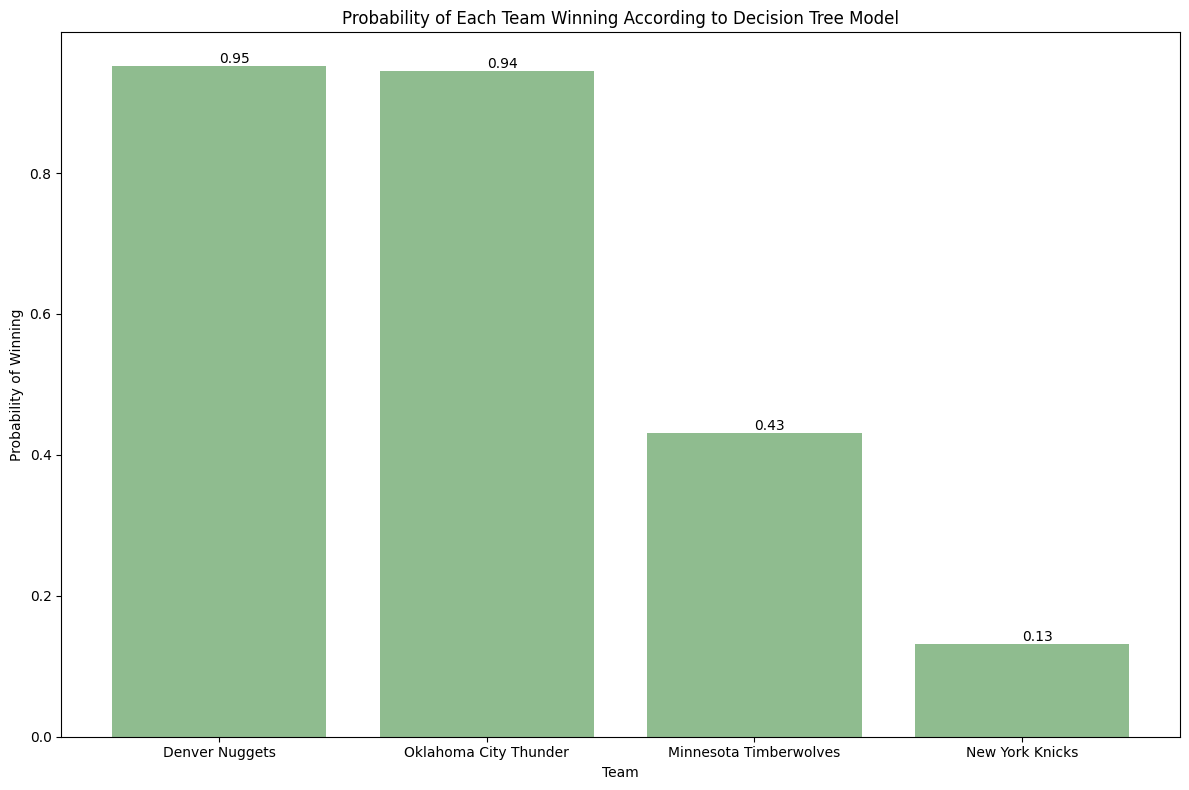

In [129]:
import matplotlib.pyplot as plt

# Filter out teams with zero probability and sort by probability in descending order
nonzero_prob_df = results_df[results_df['Probability'] > 0].sort_values('Probability', ascending=False)

# Create a bar graph for the probabilities of each team winning
plt.figure(figsize=(12, 8))
bars = plt.bar(nonzero_prob_df['Team'], nonzero_prob_df['Probability'], color='#8FBC8F')  # A less saturated green color
plt.xlabel('Team')
plt.ylabel('Probability of Winning')
plt.title('Probability of Each Team Winning According to Decision Tree Model')
plt.xticks(rotation=0)  # Rotate team names for better readability due to sorting

# Add text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()
